This notebook is to reorganise the folder structure of reference genomes and annotations downloaded using NCBI datasets ABI

```
datasets download genome taxon 2698737 --assembly-level chromosome,complete --annotated --reference  --include genome,gff3
```

In [15]:
import pandas as pd
import json
import seaborn as sns
from matplotlib import pyplot as plt

# extract info from data report

In [2]:
assembly_data_report = "/users/rg/fzanarello/ncbi_dataset/data/assembly_data_report.jsonl"

In [3]:
df = pd.read_json(assembly_data_report, lines=True)

In [4]:
def unpack_nested_columns(dataframe, column_name):
    """Unpack a nested JSON column in a DataFrame."""
    unpacked_df = pd.json_normalize(dataframe[column_name].dropna())
    unpacked_df.columns = [f"{column_name}.{sub_col}" for sub_col in unpacked_df.columns]
    return dataframe.drop(column_name, axis=1).join(unpacked_df)

In [5]:
# Identify nested columns
nested_columns = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, dict)).any()]

# Iteratively unpack all nested columns
for column in nested_columns:
    df = unpack_nested_columns(df, column)

In [6]:
df

,accession,currentAccession,sourceDatabase,pairedAccession,organelleInfo,annotationInfo.name,annotationInfo.provider,annotationInfo.releaseDate,annotationInfo.stats.geneCounts.nonCoding,annotationInfo.stats.geneCounts.proteinCoding,...,assemblyStats.genomeCoverage,assemblyStats.numberOfOrganelles,organism.organismName,organism.taxId,organism.infraspecificNames.strain,organism.infraspecificNames.isolate,organism.commonName,wgsInfo.masterWgsUrl,wgsInfo.wgsContigsUrl,wgsInfo.wgsProjectAccession
0,GCA_000310025.1,GCA_000310025.1,SOURCE_DATABASE_GENBANK,NaN,NaN,Annotation submitted by Genoscope - CEA,Genoscope - CEA,2016-07-25,296.0,16269,...,NaN,NaN,Ectocarpus siliculosus,2880,Ec 32,NaN,NaN,https://www.ncbi.nlm.nih.gov/nuccore/CABU00000...,https://www.ncbi.nlm.nih.gov/Traces/wgs/CABU01,CABU01
1,GCA_031892065.1,GCA_031892065.1,SOURCE_DATABASE_GENBANK,NaN,NaN,Annotation submitted by Centers for Disease Co...,Centers for Disease Control and Prevention,2023-09-25,67.0,3914,...,372.0x,NaN,Cryptosporidium sp. 43IA8,2138604,NaN,43IA8,NaN,https://www.ncbi.nlm.nih.gov/nuccore/JBCHVM000...,https://www.ncbi.nlm.nih.gov/Traces/wgs/JBCHVM01,JBCHVM01
2,GCA_039657295.1,GCA_039657295.1,SOURCE_DATABASE_GENBANK,NaN,NaN,Annotation submitted by Cryptocapture,Cryptocapture,2024-05-21,69.0,3919,...,361.0x,NaN,Cryptosporidium meleagridis,93969,NaN,TU1867,NaN,https://www.ncbi.nlm.nih.gov/nuccore/AAEE00000...,https://www.ncbi.nlm.nih.gov/Traces/wgs/AAEE01,AAEE01
3,GCF_000165345.1,GCF_000165345.1,SOURCE_DATABASE_REFSEQ,GCA_000165345.1,NaN,Annotation submitted by NCBI RefSeq,NCBI RefSeq,2012-09-13,81.0,3805,...,NaN,NaN,Cryptosporidium parvum Iowa II,353152,NaN,Iowa type II,NaN,https://www.ncbi.nlm.nih.gov/nuccore/AAXT00000...,https://www.ncbi.nlm.nih.gov/Traces/wgs/AAXT02,AAXT02
4,GCF_000165395.2,GCF_000165395.2,SOURCE_DATABASE_REFSEQ,GCA_000165395.2,"[{'description': 'Apicoplast', 'submitter': 'T...",Annotation submitted by The J. Craig Venter In...,The J. Craig Venter Institute,2022-11-03,29.0,3959,...,10.0x,2.0,Babesia bovis T2Bo,484906,T2Bo,NaN,NaN,https://www.ncbi.nlm.nih.gov/nuccore/NWUJ00000...,https://www.ncbi.nlm.nih.gov/Traces/wgs/NWUJ01,NWUJ01
5,GCF_000691945.2,GCF_000691945.2,SOURCE_DATABASE_REFSEQ,GCA_000691945.2,"[{'description': 'Apicoplast', 'submitter': 'C...",Annotation submitted by Centre National de Seq...,Centre National de Sequencage GENOSCOPE,2023-04-04,84.0,3601,...,NaN,2.0,Babesia microti strain RI,1133968,RI,NaN,NaN,https://www.ncbi.nlm.nih.gov/nuccore/SHOA00000...,https://www.ncbi.nlm.nih.gov/Traces/wgs/SHOA02,SHOA02
6,GCF_000981445.1,GCF_000981445.1,SOURCE_DATABASE_REFSEQ,GCA_000981445.1,NaN,Annotation submitted by NCBI RefSeq,NCBI RefSeq,2015-06-16,NaN,5069,...,24.0x,NaN,Babesia bigemina,5866,Bond,NaN,NaN,https://www.ncbi.nlm.nih.gov/nuccore/JALLKP000...,https://www.ncbi.nlm.nih.gov/Traces/wgs/JALLKP01,JALLKP01
7,GCF_002563875.1,GCF_002563875.1,SOURCE_DATABASE_REFSEQ,GCA_002563875.1,"[{'description': 'Apicoplast', 'submitter': 'H...",Annotation submitted by Hernan Lorenzi,Hernan Lorenzi,2019-05-29,326.0,8220,...,81.0x,1.0,Besnoitia besnoiti,94643,Bb-Ger1,NaN,NaN,https://www.ncbi.nlm.nih.gov/nuccore/JAPDHQ000...,https://www.ncbi.nlm.nih.gov/Traces/wgs/JAPDHQ01,JAPDHQ01
8,GCF_004359215.1,GCF_004359215.1,SOURCE_DATABASE_REFSEQ,GCA_004359215.2,NaN,Annotation submitted by UC Davis Genome Center,UC Davis Genome Center,2024-08-29,NaN,9766,...,200.0x,NaN,Bremia lactucae,4779,SF5,NaN,lettuce downy mildew,https://www.ncbi.nlm.nih.gov/nuccore/ABQD00000...,https://www.ncbi.nlm.nih.gov/Traces/wgs/ABQD01,ABQD01
9,GCF_028658345.1,GCF_028658345.1,SOURCE_DATABASE_REFSEQ,GCA_028658345.1,NaN,Annotation submitted by University of California,University of California,2024-08-29,52.0,4165,...,150.0x,NaN,Babesia duncani,323732,NaN,WA1,NaN,https://www.ncbi.nlm.nih.gov/nuccore/BAEJ00000...,https://www.ncbi.nlm.nih.gov/Traces/wgs/BAEJ01,BAEJ01


In [7]:
df.columns

Index(['accession', 'currentAccession', 'sourceDatabase', 'pairedAccession',
       'organelleInfo', 'annotationInfo.name', 'annotationInfo.provider',
       'annotationInfo.releaseDate',
       'annotationInfo.stats.geneCounts.nonCoding',
       'annotationInfo.stats.geneCounts.proteinCoding',
       'annotationInfo.stats.geneCounts.pseudogene',
       'annotationInfo.stats.geneCounts.total',
       'annotationInfo.stats.geneCounts.other', 'annotationInfo.pipeline',
       'annotationInfo.status', 'assemblyInfo.assemblyLevel',
       'assemblyInfo.assemblyName', 'assemblyInfo.assemblyStatus',
       'assemblyInfo.assemblyType', 'assemblyInfo.bioprojectAccession',
       'assemblyInfo.bioprojectLineage', 'assemblyInfo.blastUrl',
       'assemblyInfo.comments', 'assemblyInfo.refseqCategory',
       'assemblyInfo.releaseDate', 'assemblyInfo.submitter',
       'assemblyInfo.biosample.accession', 'assemblyInfo.biosample.attributes',
       'assemblyInfo.biosample.description.organism.organ

In [8]:
interesting_columns = ['accession',
                       'annotationInfo.provider',
                       'annotationInfo.stats.geneCounts.nonCoding',
                       'annotationInfo.stats.geneCounts.proteinCoding',
                       'annotationInfo.stats.geneCounts.total',
                       'annotationInfo.stats.geneCounts.pseudogene',
                       'annotationInfo.stats.geneCounts.other',
                       'assemblyStats.contigN50',
                       'assemblyStats.gcPercent',
                       'assemblyStats.scaffoldN50',
                       'assemblyStats.totalNumberOfChromosomes',
                       'assemblyStats.totalSequenceLength',
                       'assemblyStats.totalUngappedLength',
                       'organism.organismName',
                       'organism.taxId'
                      ]

to_num_cols = [
            'annotationInfo.stats.geneCounts.nonCoding',
            'annotationInfo.stats.geneCounts.proteinCoding',
            'annotationInfo.stats.geneCounts.total',
            'annotationInfo.stats.geneCounts.pseudogene',
            'annotationInfo.stats.geneCounts.other',
            'assemblyStats.contigN50',
            'assemblyStats.gcPercent',
            'assemblyStats.scaffoldN50',
            'assemblyStats.totalNumberOfChromosomes',
            'assemblyStats.totalSequenceLength',
            'assemblyStats.totalUngappedLength',
            ]

In [100]:
clean_df = df[interesting_columns]
clean_df[to_num_cols] = clean_df[to_num_cols].apply(pd.to_numeric, errors='coerce')
clean_df.columns = clean_df.columns.map(lambda x : x.replace('.','_'))
clean_df['Genus'] = clean_df.organism_organismName.map(lambda x : x.split(' ')[0])

/tmp/2432596/ipykernel_2786429/936575126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[to_num_cols] = clean_df[to_num_cols].apply(pd.to_numeric, errors='coerce')
/tmp/2432596/ipykernel_2786429/936575126.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Genus'] = clean_df.organism_organismName.map(lambda x : x.split(' ')[0])


In [101]:
clean_df

,accession,annotationInfo_provider,annotationInfo_stats_geneCounts_nonCoding,annotationInfo_stats_geneCounts_proteinCoding,annotationInfo_stats_geneCounts_total,annotationInfo_stats_geneCounts_pseudogene,annotationInfo_stats_geneCounts_other,assemblyStats_contigN50,assemblyStats_gcPercent,assemblyStats_scaffoldN50,assemblyStats_totalNumberOfChromosomes,assemblyStats_totalSequenceLength,assemblyStats_totalUngappedLength,organism_organismName,organism_taxId,Genus
0,GCA_000310025.1,Genoscope - CEA,296.0,16269,16567,2.0,NaN,32613,53.5,497380,34,195810619,191106465,Ectocarpus siliculosus,2880,Ectocarpus
1,GCA_031892065.1,Centers for Disease Control and Prevention,67.0,3914,3981,NaN,NaN,1107646,30.0,1107646,8,9152619,9152619,Cryptosporidium sp. 43IA8,2138604,Cryptosporidium
2,GCA_039657295.1,Cryptocapture,69.0,3919,3988,NaN,NaN,1105563,31.0,1105563,8,9178484,9178484,Cryptosporidium meleagridis,93969,Cryptosporidium
3,GCF_000165345.1,NCBI RefSeq,81.0,3805,3887,NaN,1.0,1014526,30.0,1104417,8,9102324,9087724,Cryptosporidium parvum Iowa II,353152,Cryptosporidium
4,GCF_000165395.2,The J. Craig Venter Institute,29.0,3959,3988,NaN,NaN,1797577,41.5,1797577,4,8195476,8195476,Babesia bovis T2Bo,484906,Babesia
5,GCF_000691945.2,Centre National de Sequencage GENOSCOPE,84.0,3601,3685,NaN,NaN,1766409,36.5,1766409,4,6395281,6395181,Babesia microti strain RI,1133968,Babesia
6,GCF_000981445.1,NCBI RefSeq,NaN,5069,5080,11.0,NaN,2541256,50.5,2541256,5,13840936,13840936,Babesia bigemina,5866,Babesia
7,GCF_002563875.1,Hernan Lorenzi,326.0,8220,8546,NaN,NaN,4079493,57.0,4079493,13,58810784,58810784,Besnoitia besnoiti,94643,Besnoitia
8,GCF_004359215.1,UC Davis Genome Center,NaN,9766,9766,NaN,NaN,28789,46.0,5324134,19,115935664,91014439,Bremia lactucae,4779,Bremia
9,GCF_028658345.1,University of California,52.0,4165,4217,NaN,NaN,1306214,37.5,1428345,5,10408054,10372852,Babesia duncani,323732,Babesia


# Summary dataset

Text(0.5, 1.0, 'Gene count')

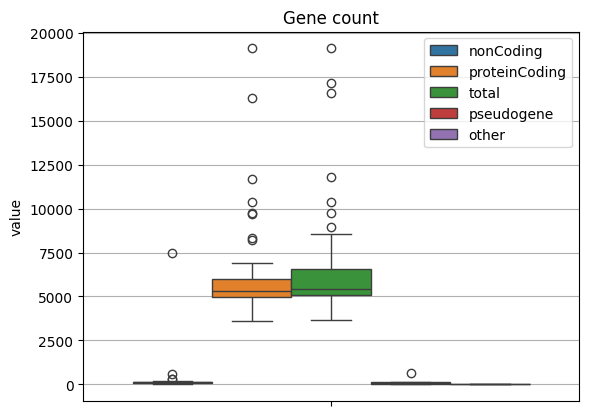

In [102]:
tmp_df = clean_df.melt(value_vars=['annotationInfo_stats_geneCounts_nonCoding',
                                   'annotationInfo_stats_geneCounts_proteinCoding',
                                   'annotationInfo_stats_geneCounts_total',
                                   'annotationInfo_stats_geneCounts_pseudogene',
                                   'annotationInfo_stats_geneCounts_other'])

tmp_df['variable'] = tmp_df['variable'].map(lambda x : x.split('_')[-1])

sns.boxplot(data = tmp_df, y = 'value', hue = 'variable')
plt.legend(bbox_to_anchor=(1., 1.))
plt.grid(axis='y')
plt.title('Gene count')

Text(0.5, 1.0, 'Assembly length and scaffold N50')

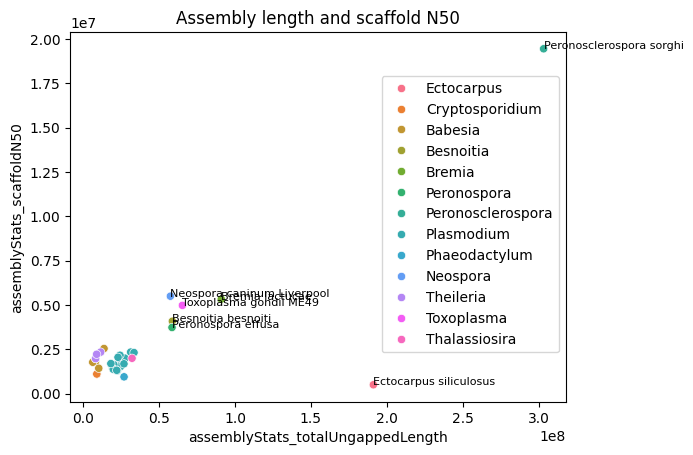

In [110]:
a = sns.scatterplot(data = clean_df, 
                   x = 'assemblyStats_totalUngappedLength',
                   y = 'assemblyStats_scaffoldN50', hue = 'Genus')

for i in (list(zip(clean_df.organism_organismName, clean_df.assemblyStats_totalUngappedLength, clean_df.assemblyStats_scaffoldN50))):
    if i[1] > 50000000:
        plt.annotate(i[0], (i[1], i[2]), size = 8)

plt.legend(bbox_to_anchor=(1., 0.9))
plt.title('Assembly length and scaffold N50')

/tmp/2432596/ipykernel_2786429/3237322994.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_yticklabels(a.get_yticklabels(), size = 8)


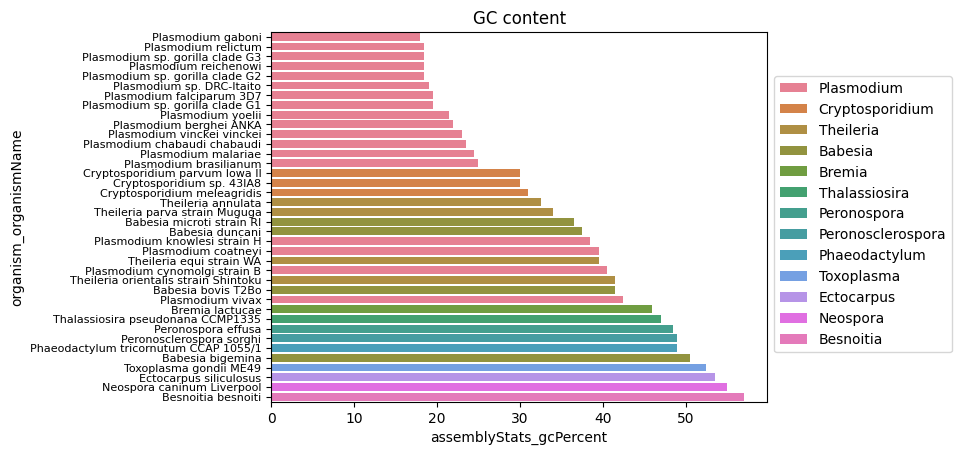

In [112]:
a = sns.barplot(data = clean_df.sort_values(by = 'assemblyStats_gcPercent') ,
            y = 'organism_organismName',
            x = 'assemblyStats_gcPercent', hue = 'Genus')

plt.legend(bbox_to_anchor=(1., 0.9))
a.set_yticklabels(a.get_yticklabels(), size = 8)
plt.title('GC content')
plt.show()

/tmp/2432596/ipykernel_2786429/3236226043.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_yticklabels(a.get_yticklabels(), size = 8)


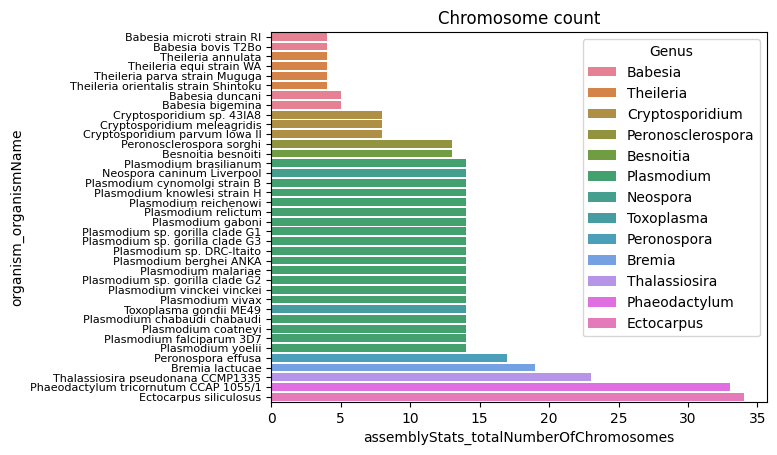

In [113]:
a = sns.barplot(data = clean_df.sort_values(by = 'assemblyStats_totalNumberOfChromosomes') ,
            y = 'organism_organismName',
            x = 'assemblyStats_totalNumberOfChromosomes', hue = 'Genus')
a.set_yticklabels(a.get_yticklabels(), size = 8)
plt.title('Chromosome count')
plt.show()

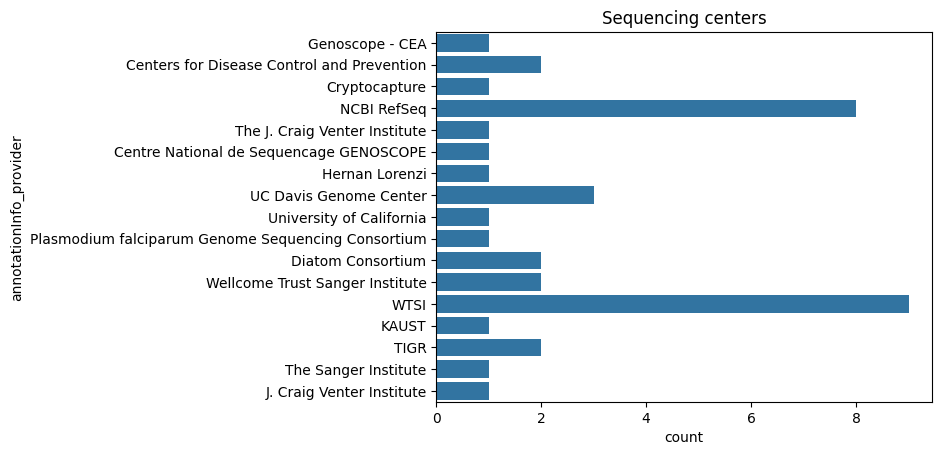

In [66]:
a = sns.countplot(data = clean_df, y= 'annotationInfo_provider')
plt.title('Sequencing centers')
plt.show()

# make species.taxonID folders

In [18]:
target_folder = '/no_backup/rg/references/species'
source_copy = '/users/rg/fzanarello/ncbi_dataset/data'

In [19]:
species_names = clean_df.organism_organismName.map(lambda x : x.replace(' ', '_')) + '.' + clean_df.organism_taxId.astype(str)

In [27]:
for assembly_name in clean_df.accession.values:
    tmp_df = clean_df[clean_df.accession == assembly_name]
    species_name = (tmp_df.organism_organismName.map(lambda x : x.replace('.', '_').replace(' ', '_').replace('__', '_')) 
                    + '.' 
                    + tmp_df.organism_taxId.astype(str)).values[0]
    filename = ! basename -s .fna $source_copy/$assembly_name/*.fna
    filename = filename[0]

    source_genome = f'{source_copy}/{assembly_name}/*.fna'
    source_ann = f'{source_copy}/{assembly_name}/*.gff'

    target_genome = f'{target_folder}/{species_name}/{assembly_name}/{filename}.fna'
    target_ann = f'{target_folder}/{species_name}/{assembly_name}/{filename}.gff'
    
    # ! mkdir -p $target_folder/$species_name/$assembly_name
    # ! cp $source_genome $target_genome
    # ! cp $source_ann $target_ann
    
    print (species_name)

Ectocarpus_siliculosus.2880
Cryptosporidium_sp_43IA8.2138604
Cryptosporidium_meleagridis.93969
Cryptosporidium_parvum_Iowa_II.353152
Babesia_bovis_T2Bo.484906
Babesia_microti_strain_RI.1133968
Babesia_bigemina.5866
Besnoitia_besnoiti.94643
Bremia_lactucae.4779
Babesia_duncani.323732
Peronospora_effusa.542832
Peronosclerospora_sorghi.230839
Plasmodium_falciparum_3D7.36329
Phaeodactylum_tricornutum_CCAP_1055/1.556484
Neospora_caninum_Liverpool.572307
Plasmodium_cynomolgi_strain_B.1120755
Plasmodium_coatneyi.208452
Plasmodium_brasilianum.5824
Plasmodium_chabaudi_chabaudi.31271
Plasmodium_berghei_ANKA.5823
Plasmodium_sp_gorilla_clade_G1.880534
Plasmodium_sp_gorilla_clade_G3.880536
Plasmodium_sp_DRC-Itaito.720590
Plasmodium_knowlesi_strain_H.5851
Plasmodium_reichenowi.5854
Plasmodium_gaboni.647221
Plasmodium_relictum.85471
Plasmodium_malariae.5858
Plasmodium_sp_gorilla_clade_G2.880535
Plasmodium_vinckei_vinckei.54757
Plasmodium_vivax.5855
Theileria_annulata.5874
Toxoplasma_gondii_ME49.50877